## PE File Malware Detection in Python


In [58]:
#Import the libraries
import numpy as np
import pandas as pd
import seaborn as sns
import pickle as pck
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [59]:
#Loading dataset from training
data = pd.read_csv('copy_dataset_malwares_6.csv', sep=',')

#The target is Malware Column {0=Benign, 1=Malware}
X = data.drop(['Name','Malware'], axis=1)
y = data['Malware']

In [60]:
data.head()

,Name,e_magic,e_lfanew,Machine,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,...,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,NumberOfRvaAndSizes,Malware
0,VirusShare_a878ba26000edaac5c98eff4432723b3,23117,248,34404,6,1236512358,240,34,523,8,...,295281,274432,2,32832,524288,8192,1048576,4096,16,1
1,VirusShare_ef9130570fddc174b312b2047f5f4cf0,23117,240,332,5,1365109591,224,258,267,9,...,0,442368,2,33088,1048576,4096,1048576,4096,16,1
2,VirusShare_ef84cdeba22be72a69b198213dada81a,23117,256,332,6,1438777028,224,14,267,6,...,0,49152,2,0,1048576,4096,1048576,69632,528,1
3,VirusShare_6bf3608e60ebc16cbcff6ed5467d469e,23117,128,332,7,1354629311,224,783,267,2,...,14174816,1032192,2,32768,2097152,4096,1048576,4096,16,1
4,VirusShare_2cc94d952b2efb13c7d6bbe0dd59d3fb,23117,128,332,7,1386631250,224,783,267,2,...,0,110592,2,0,2097152,4096,1048576,4096,16,1


In [61]:
data.columns

Index(['Name', 'e_magic', 'e_lfanew', 'Machine', 'NumberOfSections',
       'TimeDateStamp', 'SizeOfOptionalHeader', 'Characteristics', 'Magic',
       'MajorLinkerVersion', 'MinorLinkerVersion', 'SizeOfCode',
       'SizeOfInitializedData', 'SizeOfUninitializedData',
       'AddressOfEntryPoint', 'BaseOfCode', 'ImageBase', 'SectionAlignment',
       'FileAlignment', 'MajorOperatingSystemVersion',
       'MinorOperatingSystemVersion', 'MajorImageVersion', 'MinorImageVersion',
       'MajorSubsystemVersion', 'MinorSubsystemVersion', 'SizeOfHeaders',
       'CheckSum', 'SizeOfImage', 'Subsystem', 'DllCharacteristics',
       'SizeOfStackReserve', 'SizeOfStackCommit', 'SizeOfHeapReserve',
       'SizeOfHeapCommit', 'NumberOfRvaAndSizes', 'Malware'],
      dtype='object')

In [62]:
X_train, X_test, y_train, y_test= train_test_split(X,y, test_size=0.2, random_state=0)

X_train.head()

,e_magic,e_lfanew,Machine,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,...,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,NumberOfRvaAndSizes
17996,23117,128,34404,2,1375747120,240,34,523,11,0,...,512,56317,57344,3,34144,4194304,16384,1048576,8192,16
15684,23117,128,332,3,1377174991,224,8450,267,11,0,...,512,53909,32768,3,34112,1048576,4096,1048576,4096,16
7091,23117,256,332,3,708992537,224,33167,267,2,25,...,4096,1215280277,1175552,2,0,1048576,16384,1048576,4096,16
5374,23117,200,332,3,1396988441,224,271,267,6,0,...,4096,106294,73728,2,0,1048576,4096,1048576,4096,16
174,23117,256,332,2,1299829942,224,33166,267,15,25,...,1024,34535,69632,2,0,1048576,16384,1048576,4096,16


In [63]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [64]:
X_new = pd.DataFrame(X_scaled, columns=X.columns)
X_new.head()

,e_magic,e_lfanew,Machine,NumberOfSections,TimeDateStamp,SizeOfOptionalHeader,Characteristics,Magic,MajorLinkerVersion,MinorLinkerVersion,...,SizeOfHeaders,CheckSum,SizeOfImage,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,NumberOfRvaAndSizes
0,0.0,-1.430774,2.537439,-1.502404,0.312966,2.293870,-0.579573,2.537439,0.241076,-0.286175,...,-0.079674,-0.233333,-0.055252,1.745517,0.974551,2.294950,0.106457,-0.01653,-0.023084,-0.0118
1,0.0,-1.430774,-0.394100,-1.005719,0.317846,-0.366751,0.307755,-0.394098,0.241076,-0.286175,...,-0.079674,-0.233338,-0.056272,1.745517,0.972598,-0.017584,-0.043569,-0.01653,-0.031008,-0.0118
2,0.0,0.555140,-0.394100,-1.005719,-1.965776,-0.366751,2.913754,-0.394098,-0.716608,1.113211,...,0.149854,2.211087,-0.008844,-0.354780,-1.108361,-0.017584,0.106457,-0.01653,-0.031008,-0.0118
3,0.0,-0.313697,-0.394100,-1.005719,0.385562,-0.366751,-0.554585,-0.394098,-0.290971,-0.286175,...,0.149854,-0.233232,-0.054572,-0.354780,-1.108361,-0.017584,-0.043569,-0.01653,-0.031008,-0.0118
4,0.0,0.555140,-0.394100,-1.502404,0.053507,-0.366751,2.913649,-0.394098,0.666714,1.113211,...,-0.046884,-0.233377,-0.054742,-0.354780,-1.108361,-0.017584,0.106457,-0.01653,-0.031008,-0.0118


In [65]:
skpca = PCA(n_components=25)
X_pca = skpca.fit_transform(X_new)
print('Variance sum : ', skpca.explained_variance_ratio_.cumsum()[-1])

Variance sum :  0.9462032604796153


In [66]:
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier, ExtraTreesClassifier

In [67]:
# Random Forest Classifier
model_rf = RFC(n_estimators=100, random_state=0, 
               oob_score=True, max_depth=16, 
               max_features='sqrt')
model_rf.fit(X_pca, y_train)

X_test_scaled = scaler.transform(X_test)
X_test_new = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_pca = skpca.transform(X_test_new)

y_pred_rf = model_rf.predict(X_test_pca)

# Decision Tree Classifier
model_dt = DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0)

# AdaBoost Classifier (without specifying base_estimator)
model_ada = AdaBoostClassifier(n_estimators=100, random_state=0)

# Extra Trees Classifier
model_et = ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)

# Gradient Boosting Classifier
model_gbm = GradientBoostingClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0)

# List of models
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Training and evaluating each model
for model, model_name in zip(models, model_names):
    model.fit(X_pca, y_train)
    y_pred = model.predict(X_test_pca)
    print(f"\nClassification Report for {model_name}:")
    print(classification_report(y_pred, y_test))



Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       977
           1       0.99      0.99      0.99      2946

    accuracy                           0.99      3923
   macro avg       0.98      0.99      0.98      3923
weighted avg       0.99      0.99      0.99      3923


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1016
           1       0.98      0.99      0.98      2907

    accuracy                           0.98      3923
   macro avg       0.97      0.97      0.97      3923
weighted avg       0.98      0.98      0.98      3923



C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(



Classification Report for AdaBoost:
              precision    recall  f1-score   support

           0       0.93      0.95      0.94       988
           1       0.98      0.98      0.98      2935

    accuracy                           0.97      3923
   macro avg       0.96      0.96      0.96      3923
weighted avg       0.97      0.97      0.97      3923


Classification Report for Extra Trees:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95       955
           1       0.99      0.98      0.98      2968

    accuracy                           0.98      3923
   macro avg       0.96      0.98      0.97      3923
weighted avg       0.98      0.98      0.98      3923


Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       989
           1       0.99      0.99      0.99      2934

    accuracy                           0.98      3923
   ma

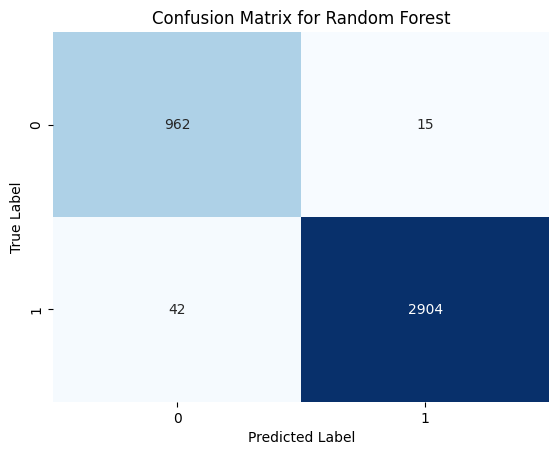

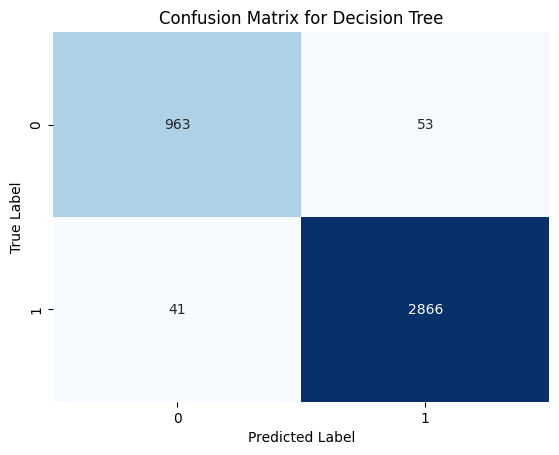

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


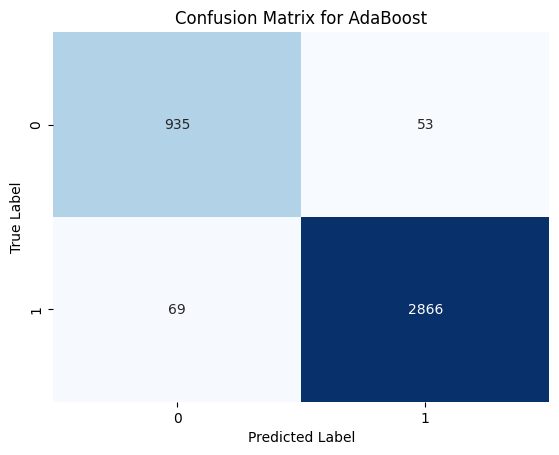

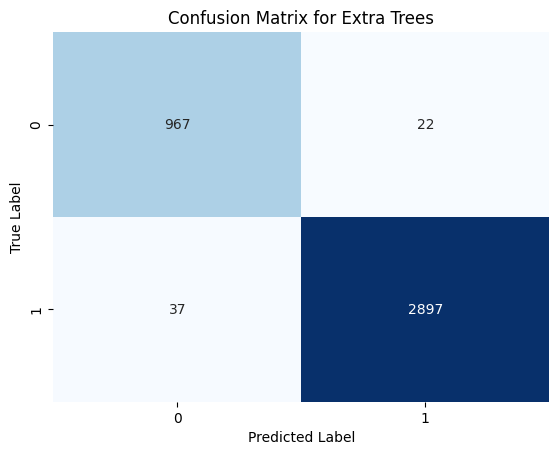

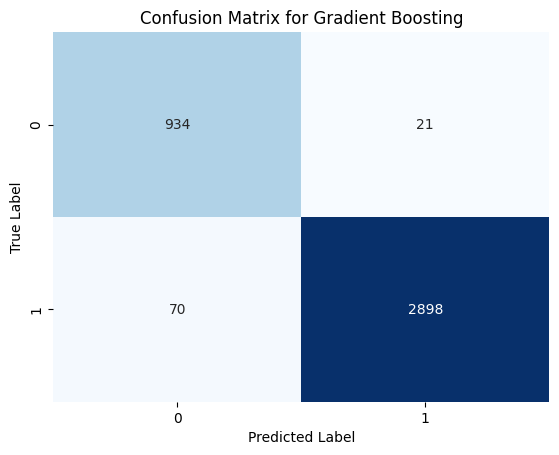

In [68]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models
models = [
    RFC(n_estimators=100, random_state=0, oob_score=True, max_depth=16, max_features='sqrt'),
    DecisionTreeClassifier(max_depth=16, max_features='sqrt', random_state=0),
    AdaBoostClassifier(n_estimators=100, random_state=0),
    GradientBoostingClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0),
    ExtraTreesClassifier(n_estimators=100, max_depth=16, max_features='sqrt', random_state=0),
]

# Model names
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Train, predict, and evaluate each model
for model, model_name in zip(models, model_names):
    # Train the model
    model.fit(X_pca, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test_pca)
    
    # Plot confusion matrix
    sns.heatmap(confusion_matrix(y_pred, y_test), annot=True, fmt="d", cmap=plt.cm.Blues, cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()


In [69]:
from sklearn.pipeline import Pipeline
import joblib

# Define the pipeline
pipe_rf = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_rf)])
pipe_dt = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_dt)])
pipe_ada = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_ada)])
pipe_et = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_et)])
pipe_gbm = Pipeline([('scale', scaler), ('pca', skpca), ('clf', model_gbm)])

# List of pipelines
pipelines = [pipe_rf, pipe_dt, pipe_ada, pipe_et, pipe_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Train and evaluate each pipeline
for pipeline, model_name in zip(pipelines, model_names):
    # Train the pipeline
    pipeline.fit(X_train, y_train)
    
    # Save the pipeline
    joblib.dump(pipeline, f'{model_name}_pipeline.pkl')

C:\Users\hp\AppData\Roaming\Python\Python312\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


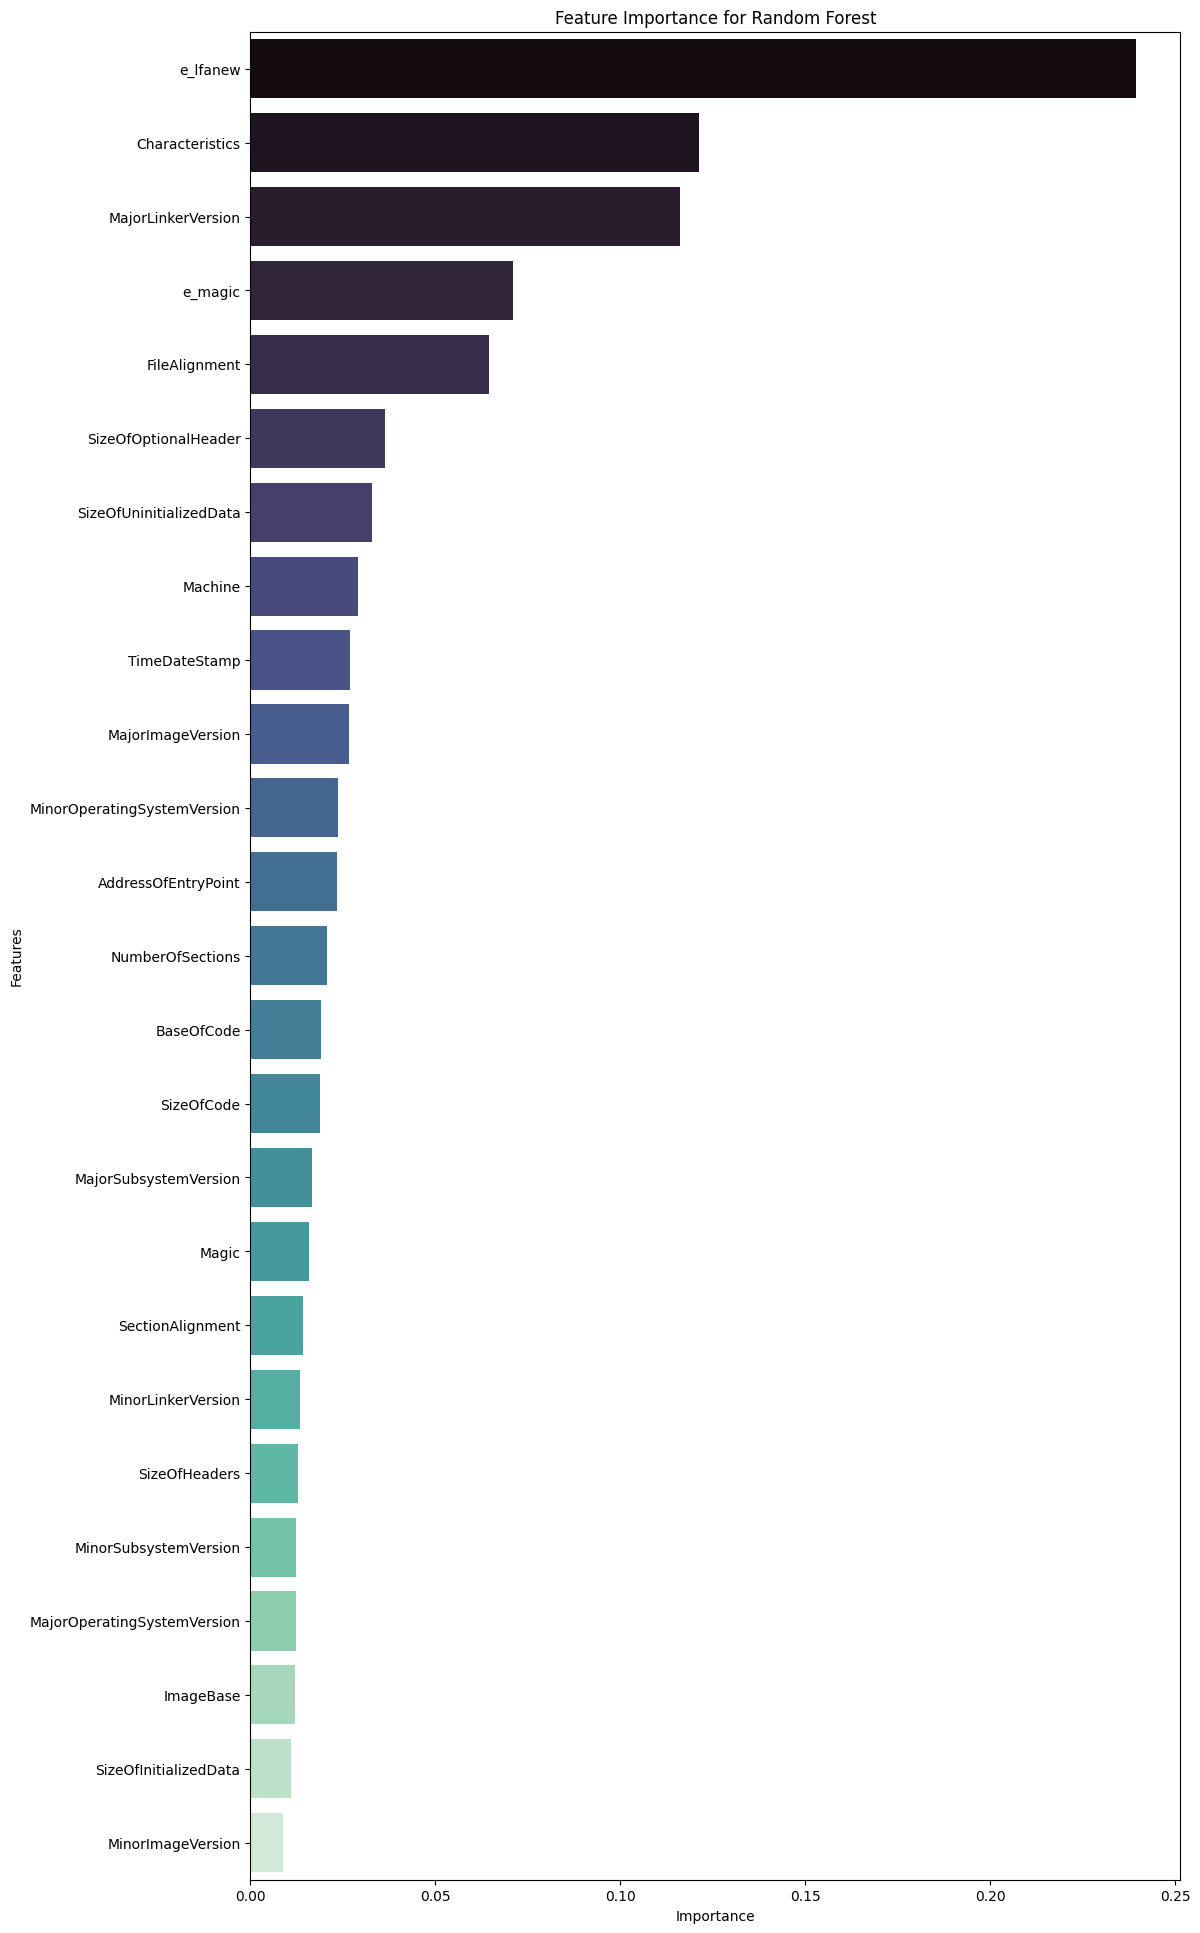

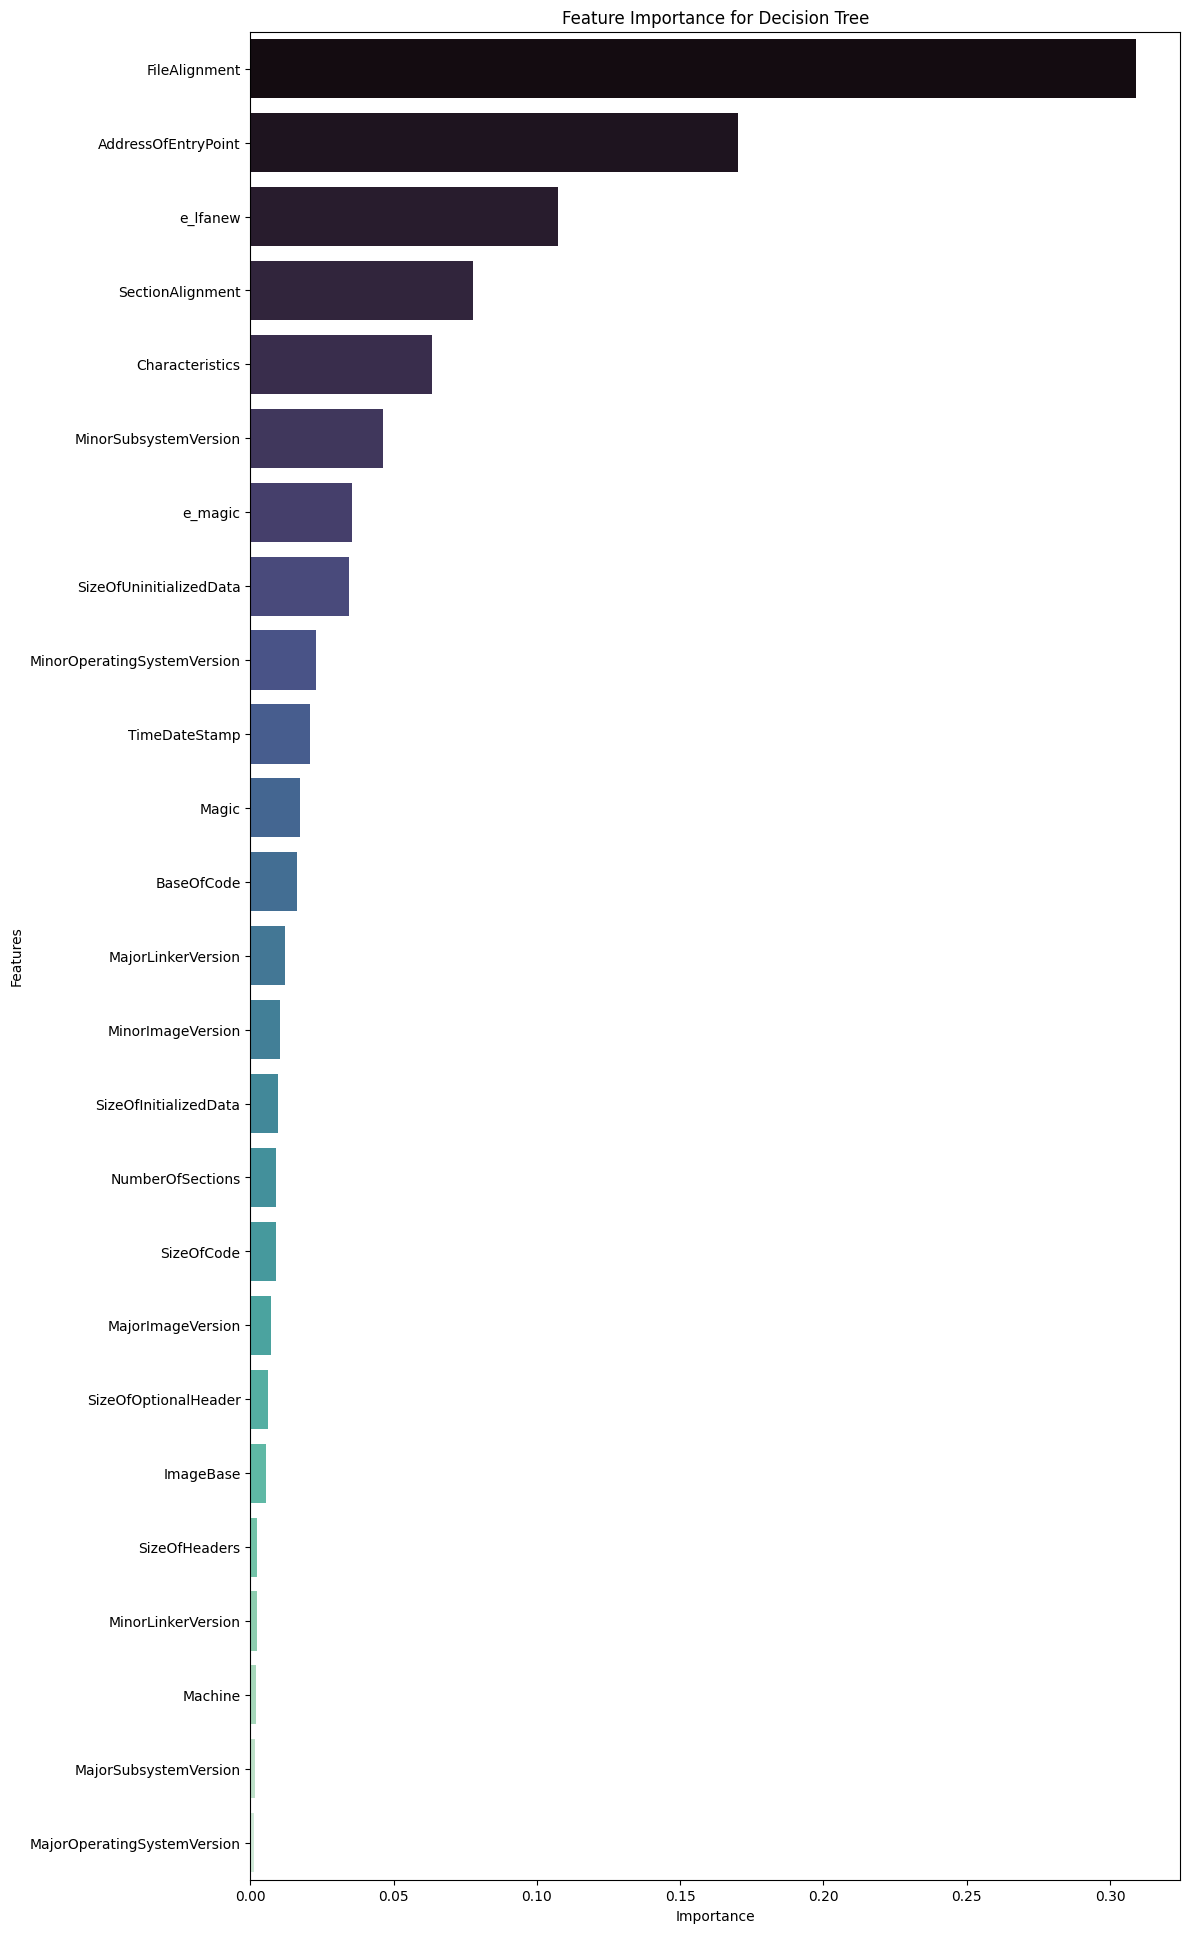

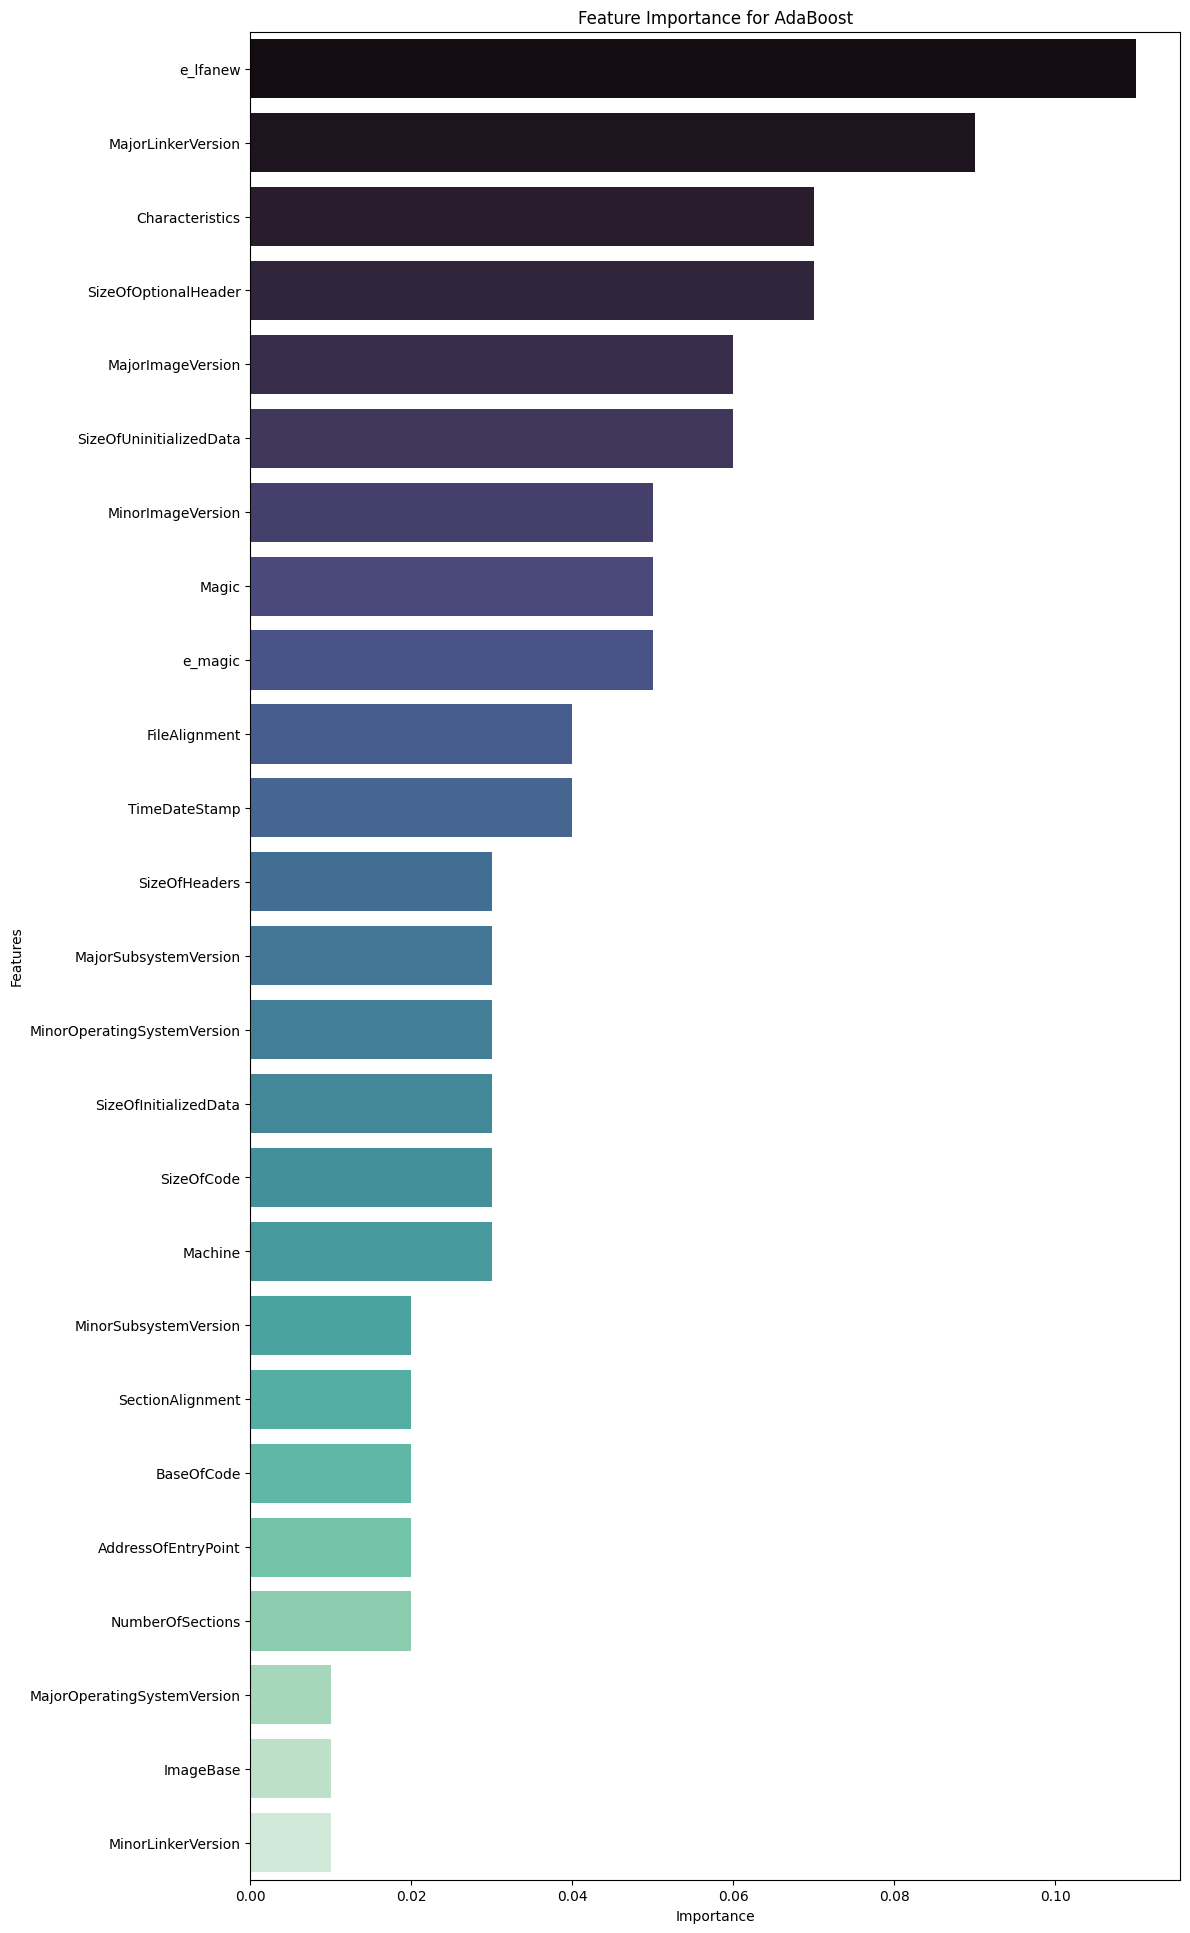

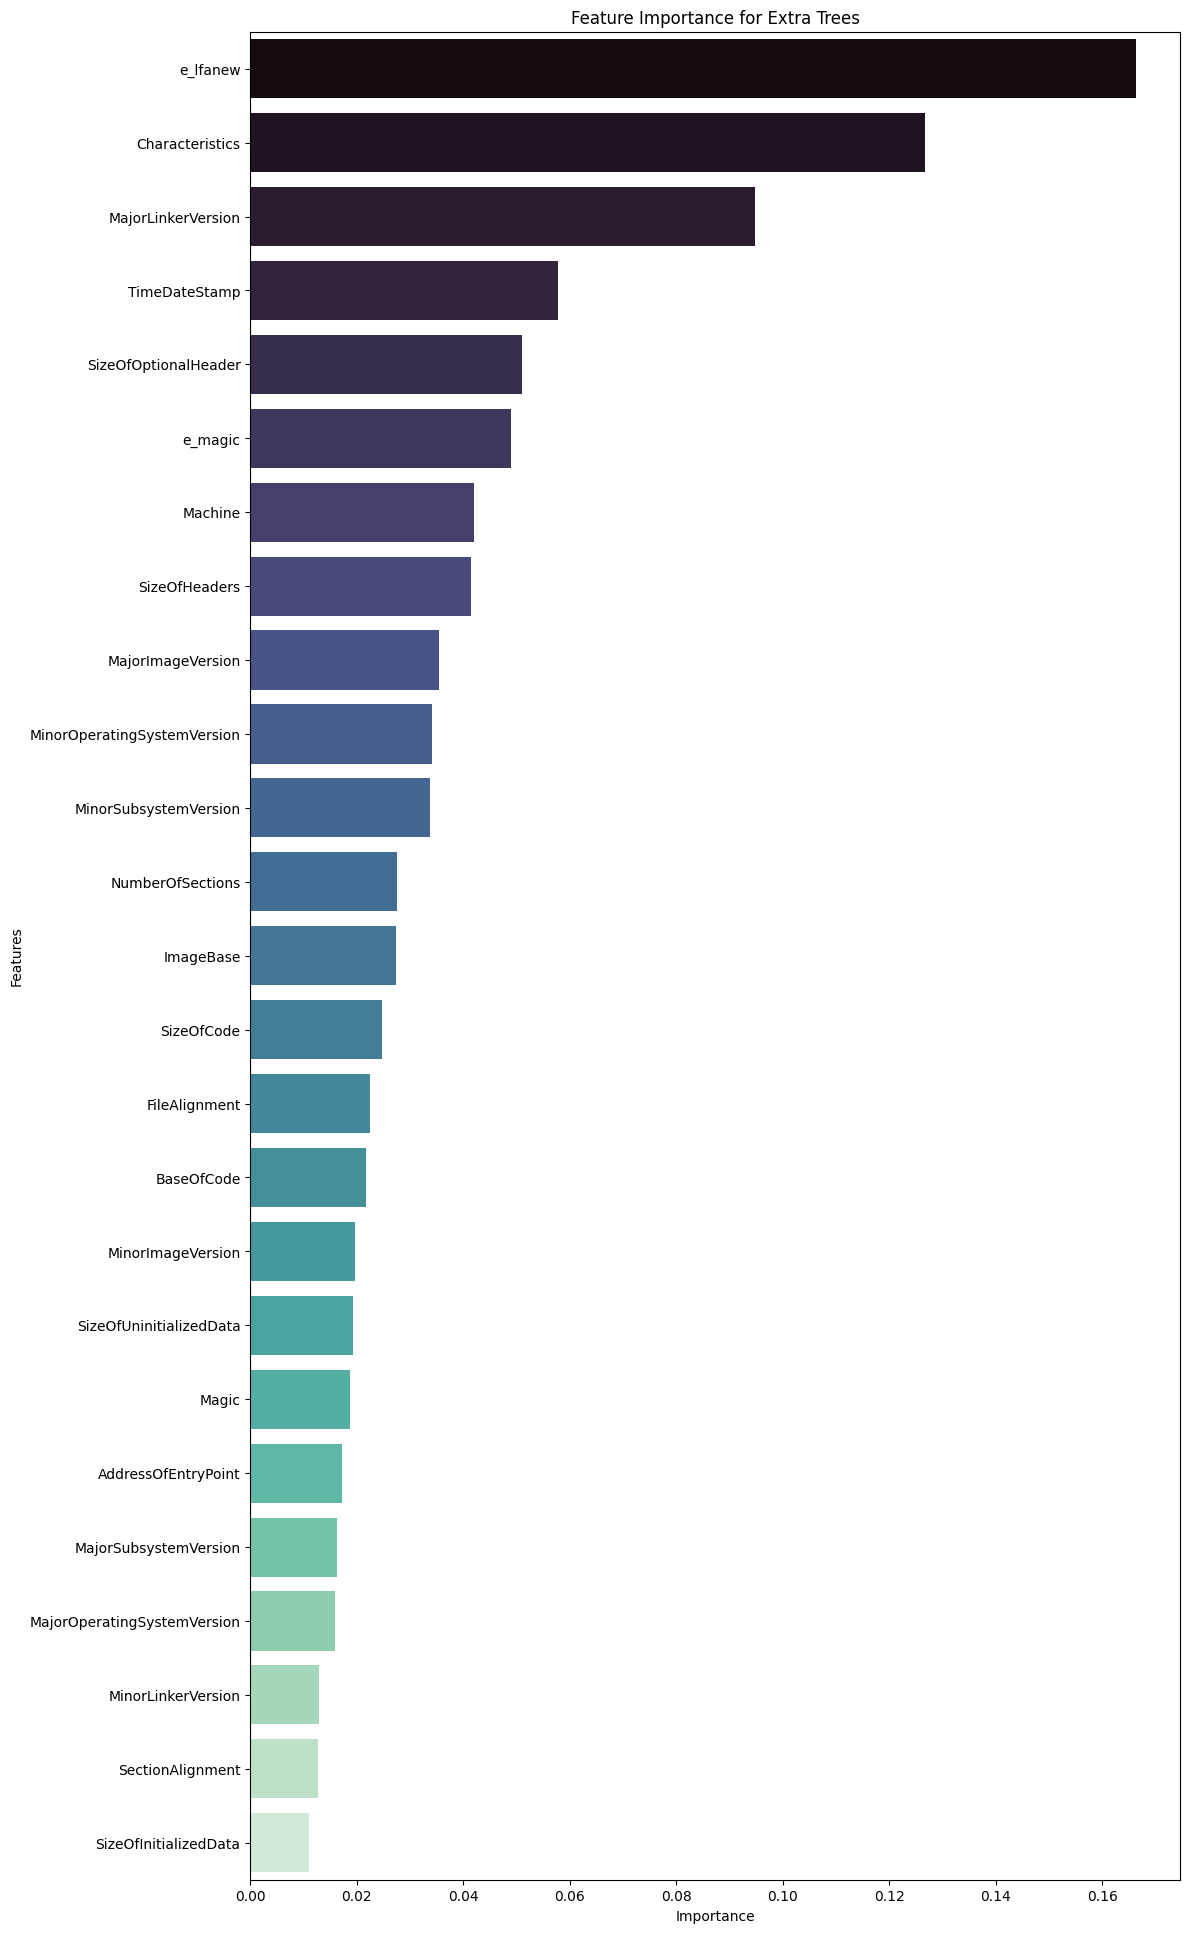

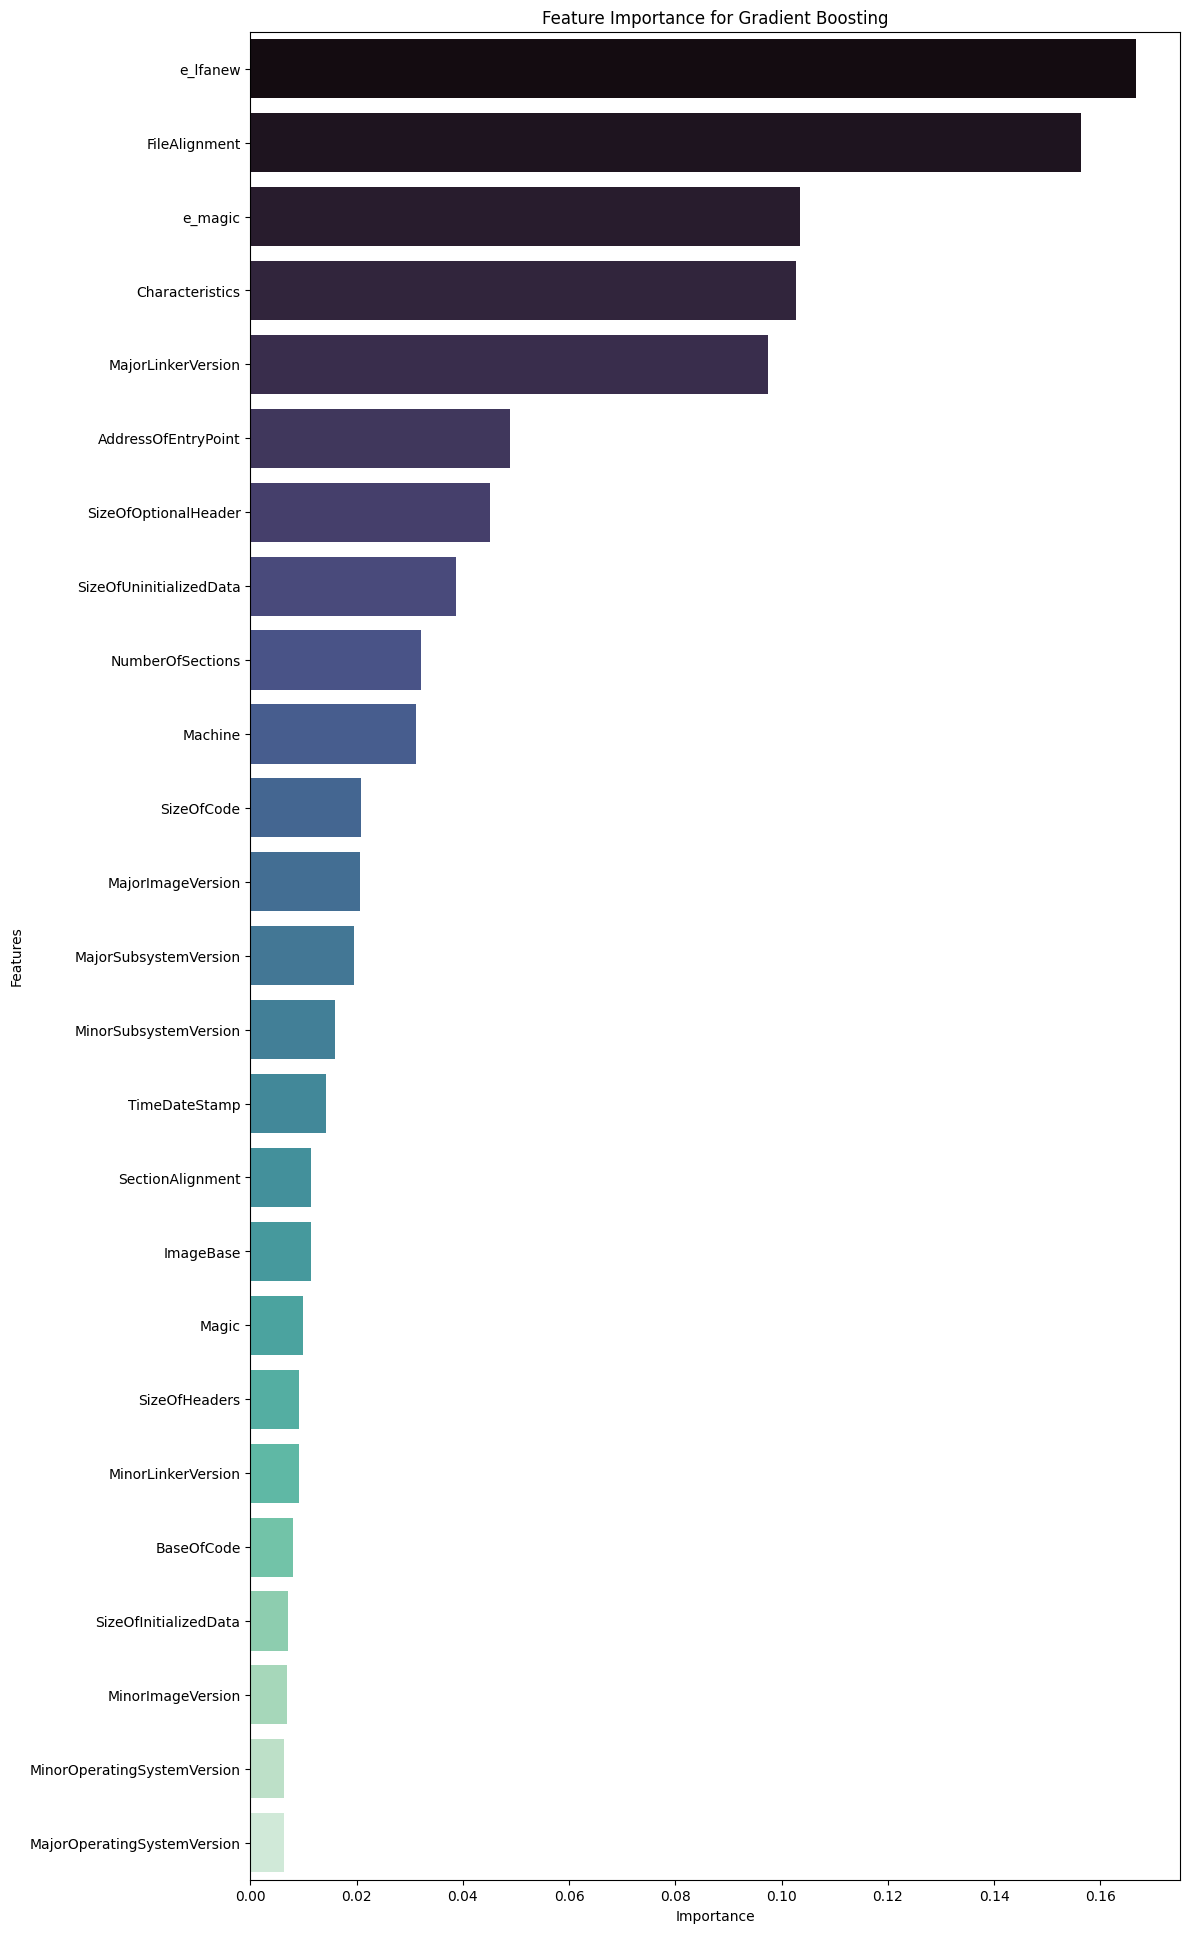

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define models and their corresponding names
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Plot feature importance for each model
for model, model_name in zip(models, model_names):
    # Get feature importances
    importance = model.feature_importances_
    
    # Create a dictionary mapping each feature to its importance value
    importance_dict = {X.columns[i]: importance[i] for i in range(len(importance))}
    
    # Sort the dictionary based on importance values
    sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
    
    # Plot the sorted feature importances using a bar plot
    plt.figure(figsize=(12, 24))
    sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], hue=list(sorted_dict.keys())[::-1], palette='mako', legend=False)
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()

Feature Importance for Random Forest:
MinorImageVersion: 0.88%
SizeOfInitializedData: 1.10%
ImageBase: 1.20%
MajorOperatingSystemVersion: 1.24%
MinorSubsystemVersion: 1.24%
SizeOfHeaders: 1.29%
MinorLinkerVersion: 1.33%
SectionAlignment: 1.43%
Magic: 1.59%
MajorSubsystemVersion: 1.68%
SizeOfCode: 1.88%
BaseOfCode: 1.91%
NumberOfSections: 2.07%
AddressOfEntryPoint: 2.34%
MinorOperatingSystemVersion: 2.36%
MajorImageVersion: 2.65%
TimeDateStamp: 2.69%
Machine: 2.91%
SizeOfUninitializedData: 3.28%
SizeOfOptionalHeader: 3.65%
FileAlignment: 6.44%
e_magic: 7.11%
MajorLinkerVersion: 11.63%
Characteristics: 12.14%
e_lfanew: 23.94%




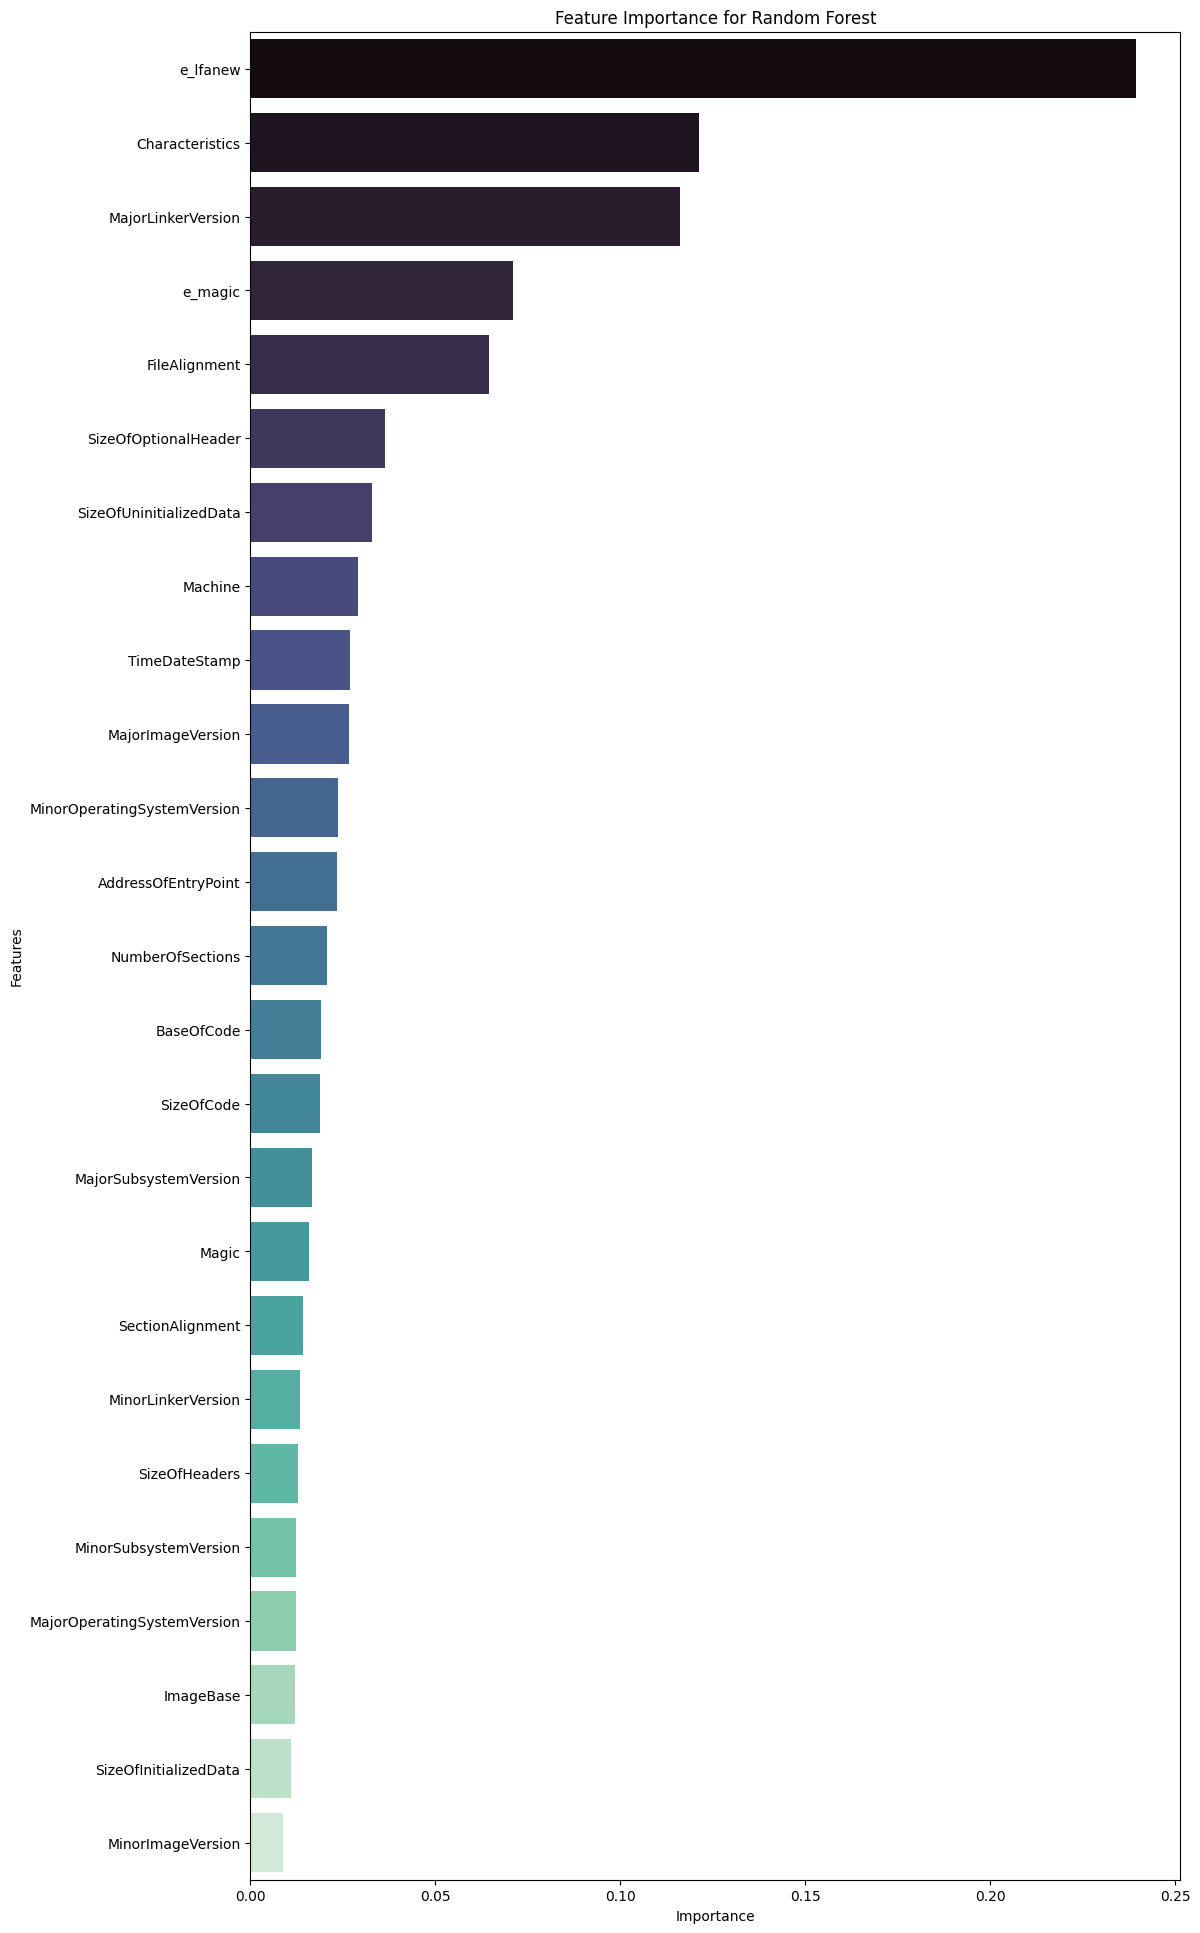

Feature Importance for Decision Tree:
MajorOperatingSystemVersion: 0.14%
MajorSubsystemVersion: 0.16%
Machine: 0.18%
MinorLinkerVersion: 0.25%
SizeOfHeaders: 0.25%
ImageBase: 0.56%
SizeOfOptionalHeader: 0.61%
MajorImageVersion: 0.71%
SizeOfCode: 0.89%
NumberOfSections: 0.91%
SizeOfInitializedData: 0.97%
MinorImageVersion: 1.03%
MajorLinkerVersion: 1.20%
BaseOfCode: 1.63%
Magic: 1.74%
TimeDateStamp: 2.09%
MinorOperatingSystemVersion: 2.30%
SizeOfUninitializedData: 3.45%
e_magic: 3.56%
MinorSubsystemVersion: 4.62%
Characteristics: 6.34%
SectionAlignment: 7.76%
e_lfanew: 10.75%
AddressOfEntryPoint: 17.01%
FileAlignment: 30.91%




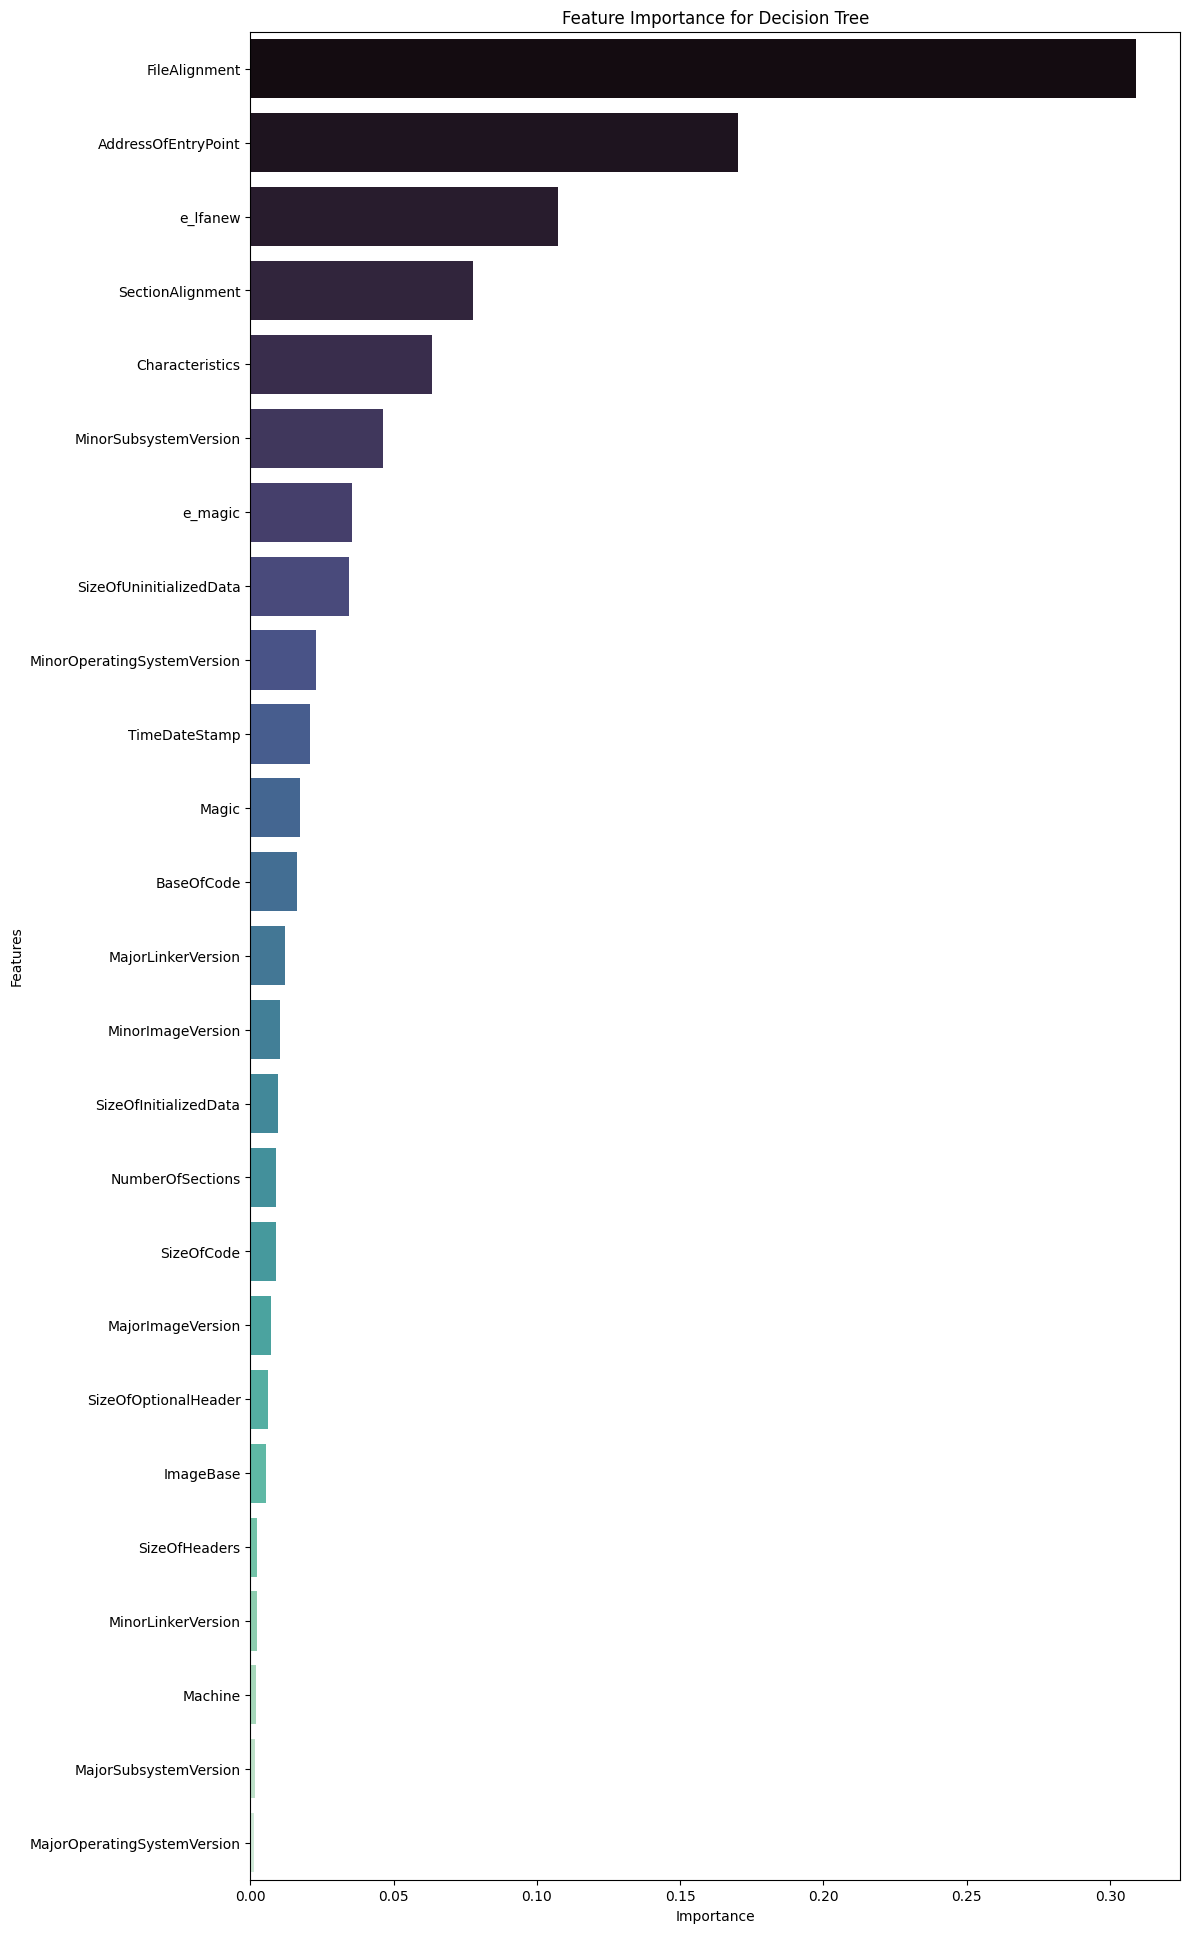

Feature Importance for AdaBoost:
MinorLinkerVersion: 1.00%
ImageBase: 1.00%
MajorOperatingSystemVersion: 1.00%
NumberOfSections: 2.00%
AddressOfEntryPoint: 2.00%
BaseOfCode: 2.00%
SectionAlignment: 2.00%
MinorSubsystemVersion: 2.00%
Machine: 3.00%
SizeOfCode: 3.00%
SizeOfInitializedData: 3.00%
MinorOperatingSystemVersion: 3.00%
MajorSubsystemVersion: 3.00%
SizeOfHeaders: 3.00%
TimeDateStamp: 4.00%
FileAlignment: 4.00%
e_magic: 5.00%
Magic: 5.00%
MinorImageVersion: 5.00%
SizeOfUninitializedData: 6.00%
MajorImageVersion: 6.00%
SizeOfOptionalHeader: 7.00%
Characteristics: 7.00%
MajorLinkerVersion: 9.00%
e_lfanew: 11.00%




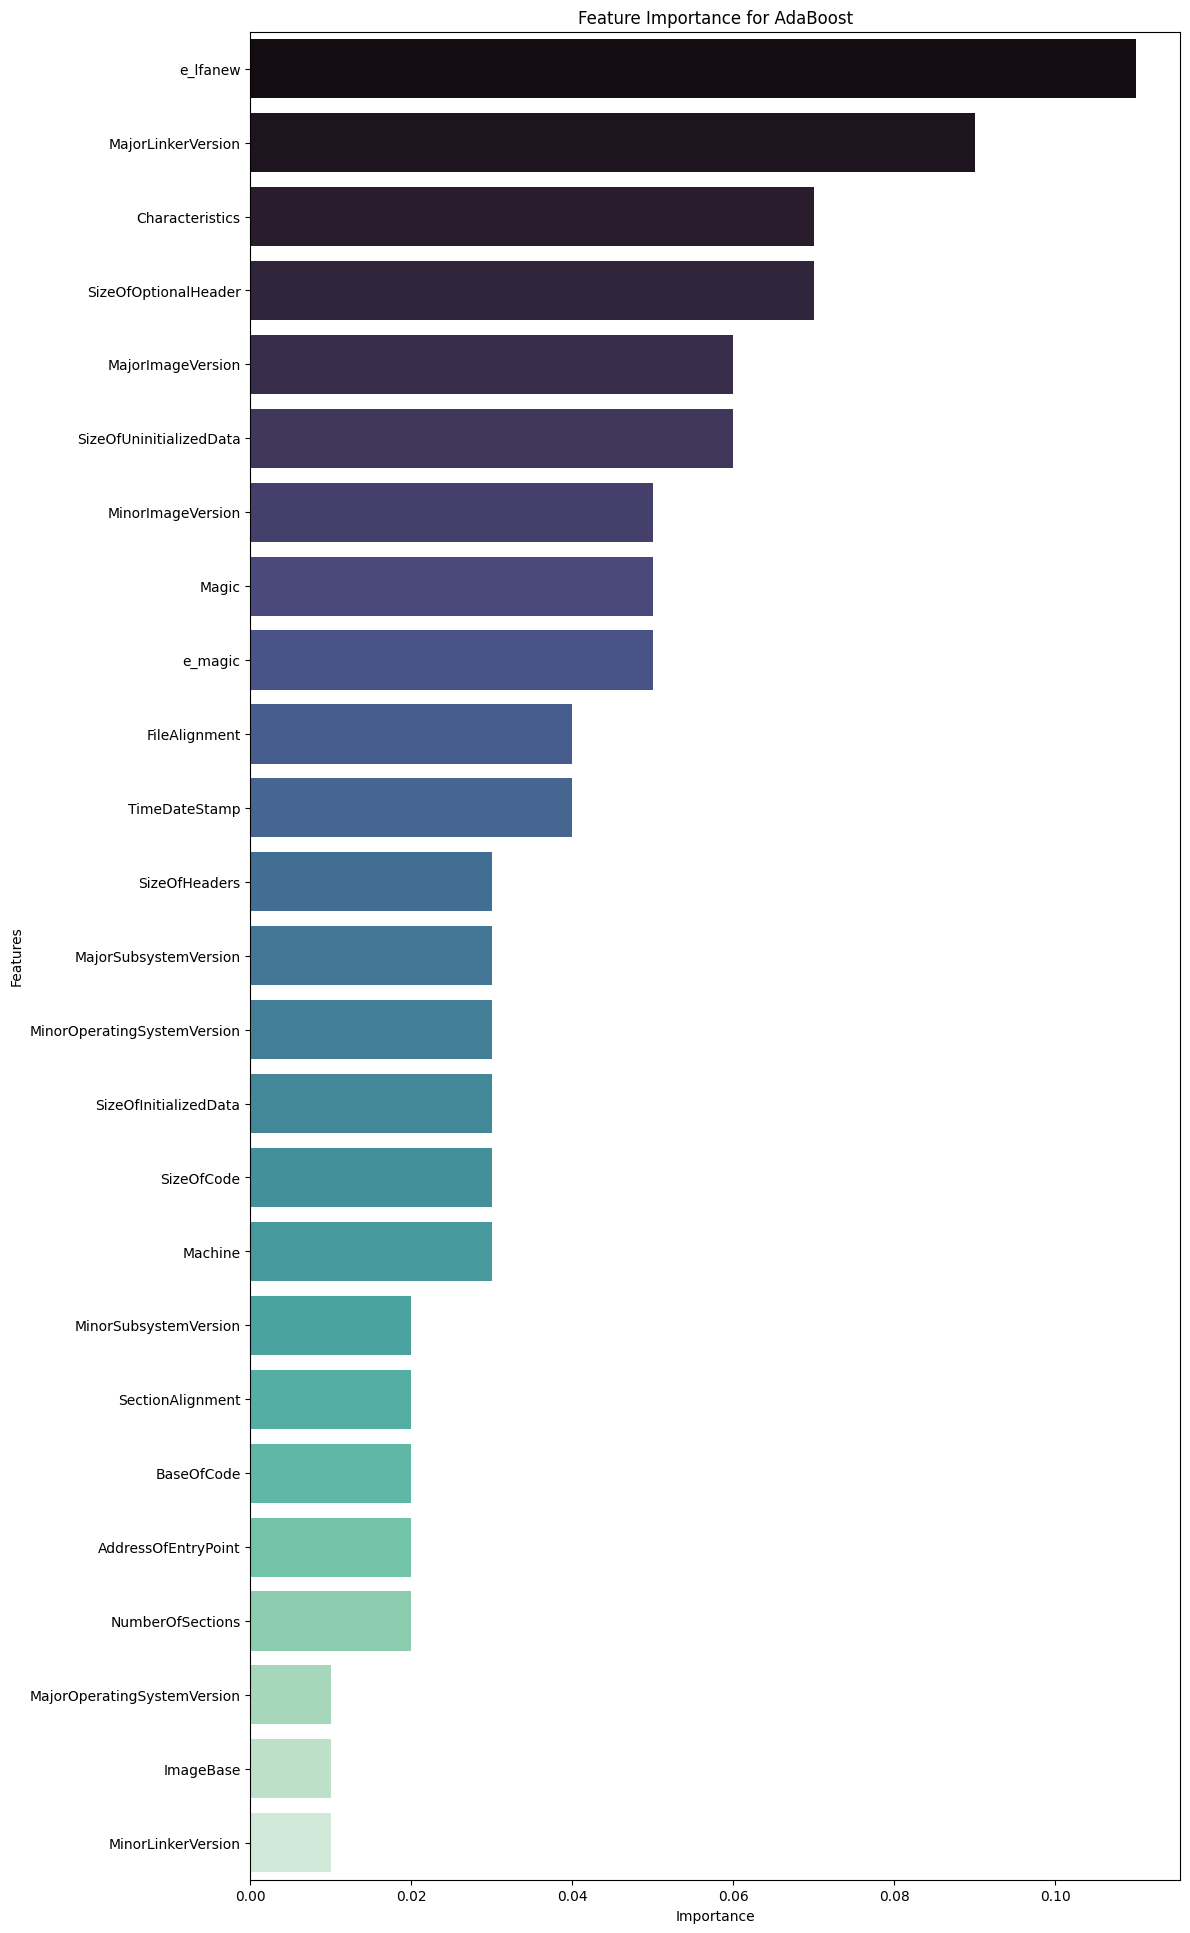

Feature Importance for Extra Trees:
SizeOfInitializedData: 1.10%
SectionAlignment: 1.27%
MinorLinkerVersion: 1.30%
MajorOperatingSystemVersion: 1.60%
MajorSubsystemVersion: 1.62%
AddressOfEntryPoint: 1.72%
Magic: 1.88%
SizeOfUninitializedData: 1.92%
MinorImageVersion: 1.97%
BaseOfCode: 2.16%
FileAlignment: 2.25%
SizeOfCode: 2.47%
ImageBase: 2.74%
NumberOfSections: 2.75%
MinorSubsystemVersion: 3.37%
MinorOperatingSystemVersion: 3.41%
MajorImageVersion: 3.55%
SizeOfHeaders: 4.14%
Machine: 4.20%
e_magic: 4.90%
SizeOfOptionalHeader: 5.11%
TimeDateStamp: 5.79%
MajorLinkerVersion: 9.48%
Characteristics: 12.67%
e_lfanew: 16.64%




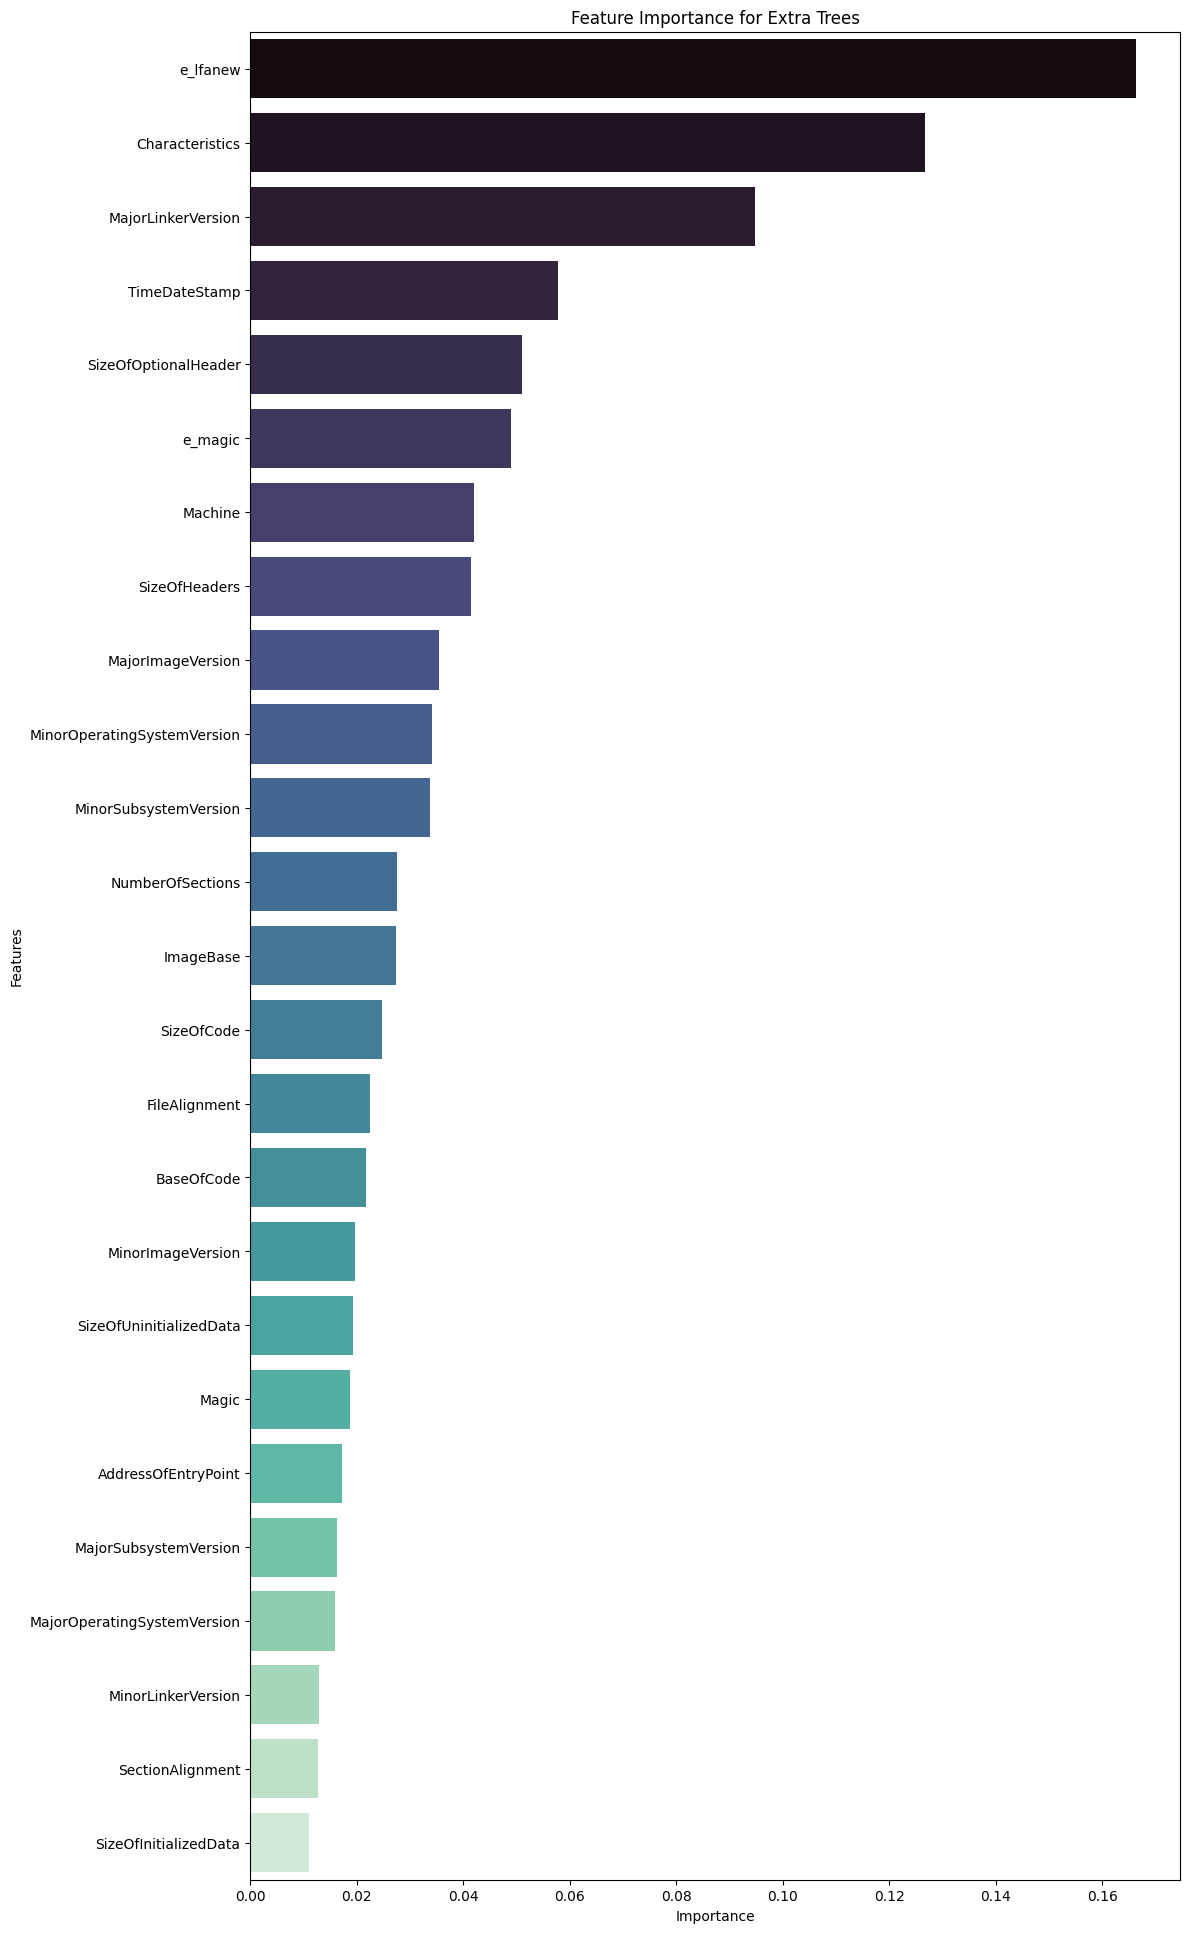

Feature Importance for Gradient Boosting:
MajorOperatingSystemVersion: 0.64%
MinorOperatingSystemVersion: 0.64%
MinorImageVersion: 0.69%
SizeOfInitializedData: 0.71%
BaseOfCode: 0.80%
MinorLinkerVersion: 0.91%
SizeOfHeaders: 0.92%
Magic: 0.99%
ImageBase: 1.14%
SectionAlignment: 1.14%
TimeDateStamp: 1.42%
MinorSubsystemVersion: 1.60%
MajorSubsystemVersion: 1.95%
MajorImageVersion: 2.07%
SizeOfCode: 2.08%
Machine: 3.13%
NumberOfSections: 3.21%
SizeOfUninitializedData: 3.88%
SizeOfOptionalHeader: 4.51%
AddressOfEntryPoint: 4.90%
MajorLinkerVersion: 9.75%
Characteristics: 10.28%
e_magic: 10.34%
FileAlignment: 15.64%
e_lfanew: 16.67%




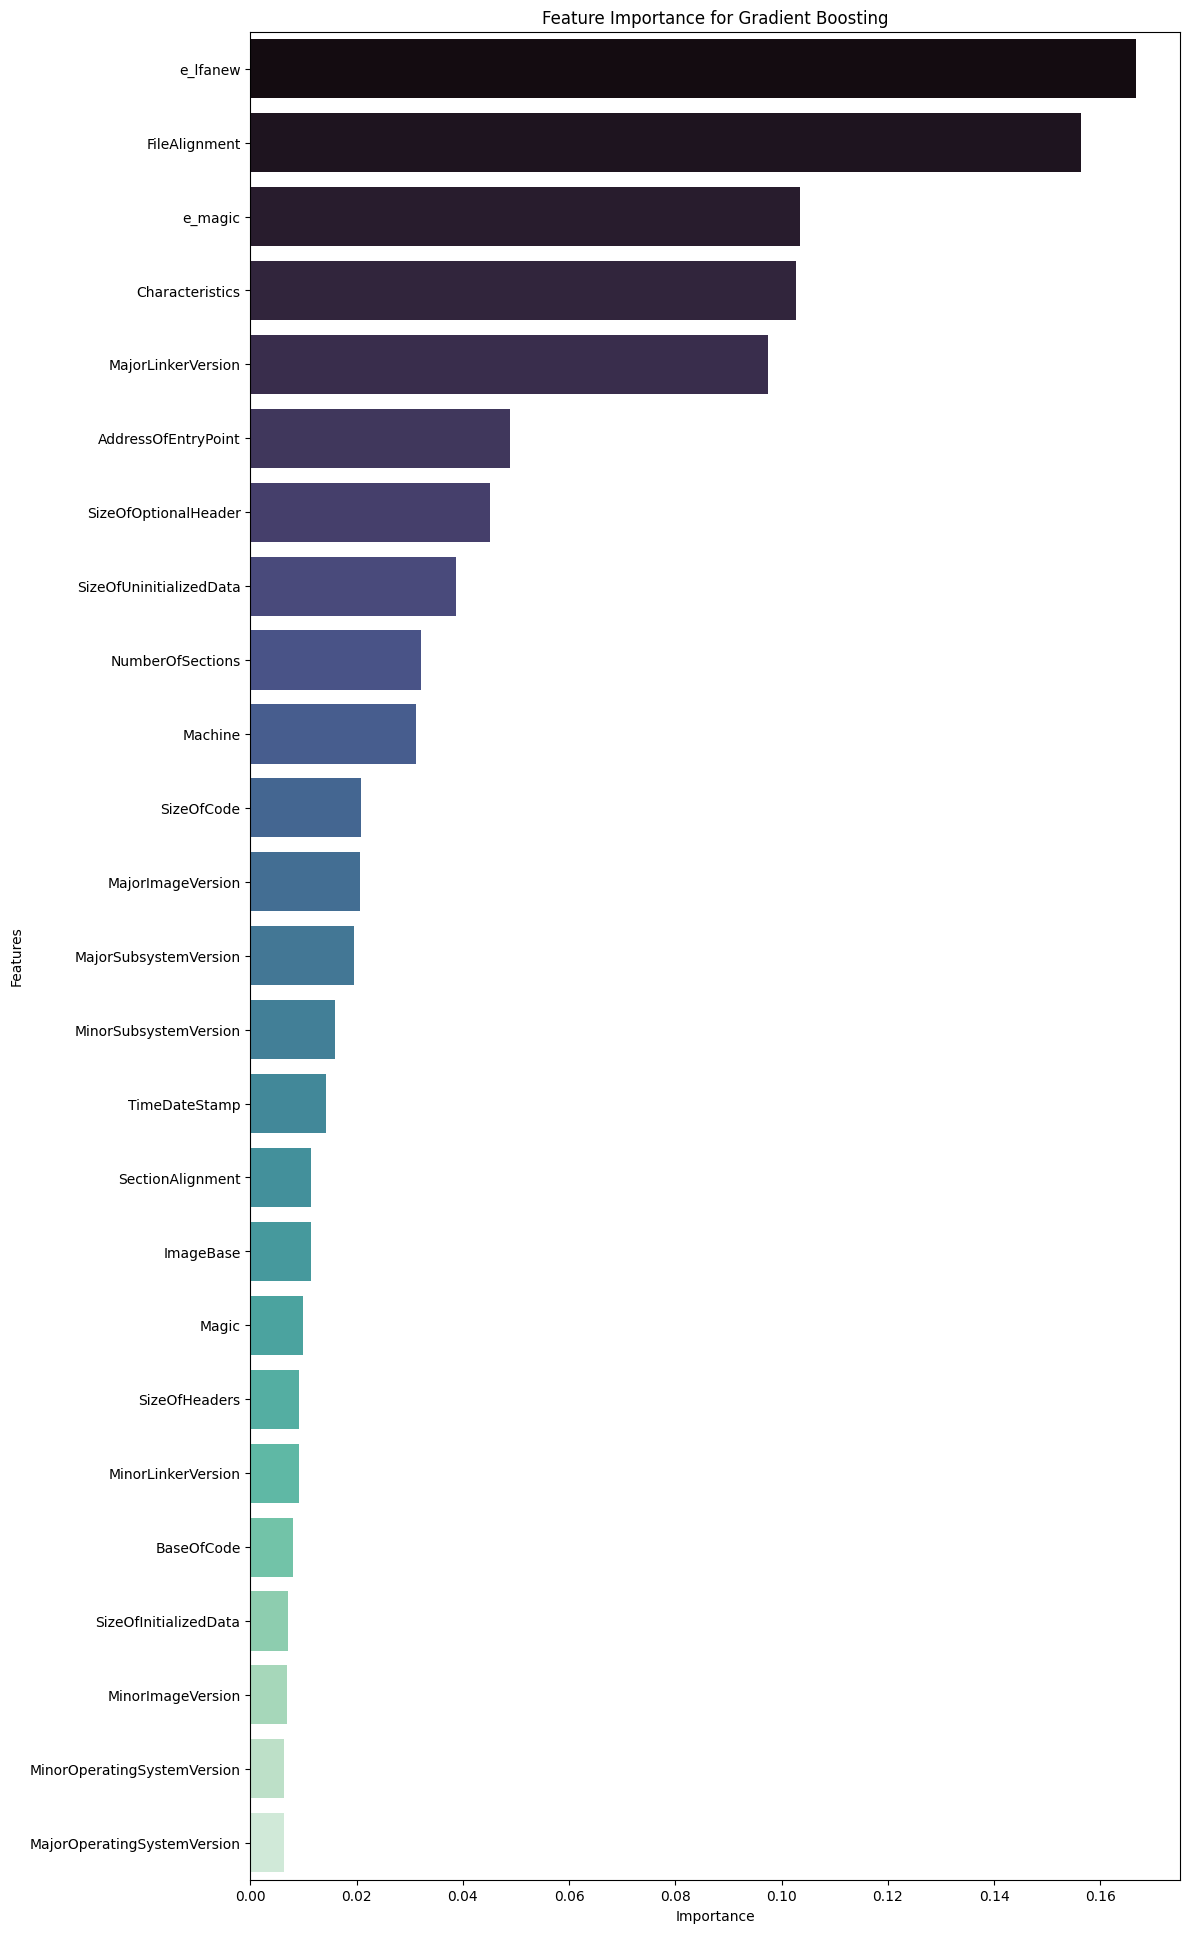

In [71]:
# Define models and their corresponding names
models = [model_rf, model_dt, model_ada, model_et, model_gbm]
model_names = ["Random Forest", "Decision Tree", "AdaBoost", "Extra Trees", "Gradient Boosting"]

# Plot feature importance for each model
for model, model_name in zip(models, model_names):
    # Get feature importances
    importance = model.feature_importances_
    
    # Create a dictionary mapping each feature to its importance value
    importance_dict = {X.columns[i]: importance[i] for i in range(len(importance))}
    
    # Sort the dictionary based on importance values
    sorted_dict = {k: v for k, v in sorted(importance_dict.items(), key=lambda item: item[1])}
    
    # Convert importance values to percentages
    total_importance = sum(importance)
    importance_percentages = {k: (v / total_importance) * 100 for k, v in sorted_dict.items()}
    
    # Print feature importance values in text format
    print(f"Feature Importance for {model_name}:")
    for feature, importance_percentage in importance_percentages.items():
        print(f"{feature}: {importance_percentage:.2f}%")
    print("\n")
    
    # Plot the sorted feature importances using a bar plot
    plt.figure(figsize=(12, 24))
    sns.barplot(y=list(sorted_dict.keys())[::-1], x=list(sorted_dict.values())[::-1], hue=list(sorted_dict.keys())[::-1], palette='mako', legend=False)
    plt.title(f'Feature Importance for {model_name}')
    plt.xlabel('Importance')
    plt.ylabel('Features')
    plt.show()


In [78]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_6.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# List of model names
model_names = ["random_forest", "decision_tree", "adaboost", "extra_trees"]

# List to store predictions for each model
predictions = []

# Load and predict using each trained pipeline
for model_name in model_names:
    # Load the pipeline
    pipeline = joblib.load(f'Random Forest_pipeline.pkl')
    
    # Transform the testing data
    X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
    X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)
    
    # Predict probabilities
    y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)
    
    # Store the predictions
    predictions.append(pd.DataFrame(y_testing_pred))

# Concatenate predictions with the test data
result = pd.concat([test['Name']] + predictions, axis=1)

# Display the result
print(result)

                                                 Name         0         1  \
0                                  Skype-8.10.0.9.exe  0.900000  0.100000   
1                                 vlc-3.0.2-win64.exe  0.474488  0.525512   
2                                       stinger32.exe  0.284202  0.715798   
3                                SpotifyFullSetup.exe  0.689760  0.310240   
4                                    uftp_english.exe  0.150548  0.849452   
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.192549  0.807451   
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.145516  0.854484   
7                                   reverse_shell.exe  0.361432  0.638568   
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.010414  0.989586   
9                             ScratchInstaller1.4.exe  0.241517  0.758483   
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.004382  0.995618   
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.001242  0.998758   

In [79]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_6.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Random Forest_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)


                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.900000  0.100000
1                                 vlc-3.0.2-win64.exe  0.474488  0.525512
2                                       stinger32.exe  0.284202  0.715798
3                                SpotifyFullSetup.exe  0.689760  0.310240
4                                    uftp_english.exe  0.150548  0.849452
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.192549  0.807451
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.145516  0.854484
7                                   reverse_shell.exe  0.361432  0.638568
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.010414  0.989586
9                             ScratchInstaller1.4.exe  0.241517  0.758483
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.004382  0.995618
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.001242  0.998758
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [80]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_6.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Gradient Boosting_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.999912  0.000088
1                                 vlc-3.0.2-win64.exe  0.363326  0.636674
2                                       stinger32.exe  0.008777  0.991223
3                                SpotifyFullSetup.exe  0.954756  0.045244
4                                    uftp_english.exe  0.003643  0.996357
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.001229  0.998771
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.037580  0.962420
7                                   reverse_shell.exe  0.061701  0.938299
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.000025  0.999975
9                             ScratchInstaller1.4.exe  0.997942  0.002058
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.000023  0.999977
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.000016  0.999984
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [81]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_6.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('AdaBoost_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.493898  0.506102
1                                 vlc-3.0.2-win64.exe  0.487312  0.512688
2                                       stinger32.exe  0.501148  0.498852
3                                SpotifyFullSetup.exe  0.507884  0.492116
4                                    uftp_english.exe  0.488730  0.511270
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.489163  0.510837
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.489090  0.510910
7                                   reverse_shell.exe  0.484122  0.515878
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.491002  0.508998
9                             ScratchInstaller1.4.exe  0.488620  0.511380
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.486919  0.513081
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.487033  0.512967
12  3ec4cb928846f8298e5a13b3e96bfc2a70

In [82]:
import pandas as pd
import joblib

# Load test data
test = pd.read_csv('copy_dataset_test_6.csv', sep=',')

# Extract features for testing
X_testing = test.drop(['Name'], axis=1)

# Load the Random Forest pipeline
pipeline = joblib.load('Extra Trees_pipeline.pkl')

# Transform the testing data
X_testing_scaled = pipeline.named_steps['scale'].transform(X_testing)
X_testing_pca = pipeline.named_steps['pca'].transform(X_testing_scaled)

# Predict probabilities using the Random Forest model
y_testing_pred = pipeline.named_steps['clf'].predict_proba(X_testing_pca)

# Create a DataFrame with the predictions and the executable file names
predictions_df = pd.DataFrame(y_testing_pred, columns=pipeline.named_steps['clf'].classes_)
predictions_df['Name'] = test['Name']

# Reorder columns to have 'Name' as the first column
predictions_df = predictions_df[['Name'] + list(predictions_df.columns[:-1])]

# Display the predictions
print(predictions_df)

                                                 Name         0         1
0                                  Skype-8.10.0.9.exe  0.398423  0.601577
1                                 vlc-3.0.2-win64.exe  0.372602  0.627398
2                                       stinger32.exe  0.242228  0.757772
3                                SpotifyFullSetup.exe  0.488917  0.511083
4                                    uftp_english.exe  0.105475  0.894525
5   161a59f2525518f799c63f916c80fe85f50c5b09c74dc2...  0.130485  0.869515
6   eaa478e65696ad5cbdb42c1b4bd6954f2a876fdde2e519...  0.082134  0.917866
7                                   reverse_shell.exe  0.256730  0.743270
8   873b9eaef6ea5ed6126086594529a3395bdbc5d63c97d8...  0.088288  0.911712
9                             ScratchInstaller1.4.exe  0.058984  0.941016
10  69eb27dd3bbf5077dcd795872535b89af9a898254b90ad...  0.041520  0.958480
11  3334686141a400bb522824fa6f7faf30614372fe11837a...  0.025904  0.974096
12  3ec4cb928846f8298e5a13b3e96bfc2a70